In [136]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [137]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

print('Train data size ', x_train.shape, x_test.shape)

Train data size  (50000, 32, 32, 3) (10000, 32, 32, 3)


In [138]:
classes = np.unique(y_train)
no_of_classes = len(classes)

print('Classes ', classes)
print('Number of Classes', no_of_classes)

Classes  [0 1 2 3 4 5 6 7 8 9]
Number of Classes 10


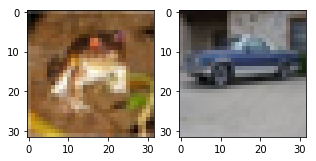

In [358]:
plt.figure(figsize=[5,5])

# Display the first&last image in training data

plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')

plt.subplot(122)
plt.imshow(x_train[10000,:,:],cmap='gray')

In [359]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
#print(x_test[0])

In [18]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

print('Class label',y_train[1000])
print('Encoded Class label ',train_Y_one_hot[1000])

Class label [9]
Encoded Class label  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [20]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(x_train,train_Y_one_hot,test_size=0.2,random_state=13)

In [21]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [22]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [23]:
batch_size=64
epochs=20
num_classes=10

In [24]:
cifar_model=Sequential()
cifar_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(32,32,3),padding='same'))
cifar_model.add(LeakyReLU(alpha=0.1))
cifar_model.add(MaxPooling2D((2,2),padding='same'))
cifar_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
cifar_model.add(LeakyReLU(alpha=0.1))
cifar_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cifar_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
cifar_model.add(LeakyReLU(alpha=0.1))
cifar_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cifar_model.add(Flatten())
cifar_model.add(Dense(128,activation='linear'))
cifar_model.add(LeakyReLU(alpha=0.1))
cifar_model.add(Dense(num_classes,activation='softmax'))

In [25]:
cifar_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
cifar_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [26]:
cifar_train = cifar_model.fit(train_X,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 194s 5ms/step - loss: 1.4451 - acc: 0.4792 - val_loss: 1.1013 - val_acc: 0.6058
Epoch 2/20
40000/40000 [==============================] - 157s 4ms/step - loss: 0.9829 - acc: 0.6552 - val_loss: 0.9086 - val_acc: 0.6871
Epoch 3/20
40000/40000 [==============================] - 163s 4ms/step - loss: 0.7929 - acc: 0.7234 - val_loss: 0.9107 - val_acc: 0.6832
Epoch 4/20
40000/40000 [==============================] - 158s 4ms/step - loss: 0.6671 - acc: 0.7668 - val_loss: 0.8217 - val_acc: 0.7173
Epoch 5/20
40000/40000 [==============================] - 90s 2ms/step - loss: 0.5641 - acc: 0.8050 - val_loss: 0.7693 - val_acc: 0.7411
Epoch 6/20
40000/40000 [==============================] - 84s 2ms/step - loss: 0.4617 - acc: 0.8375 - val_loss: 0.7685 - val_acc: 0.7503
Epoch 7/20
40000/40000 [==============================] - 83s 2ms/step - loss: 0.3712 - acc: 0.8696 - val_loss: 0.8597 - val

In [27]:
test_eval = cifar_model.evaluate(x_test, test_Y_one_hot, verbose=0)

In [28]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.7096859892845153
Test accuracy: 0.7229


<Figure size 432x288 with 0 Axes>

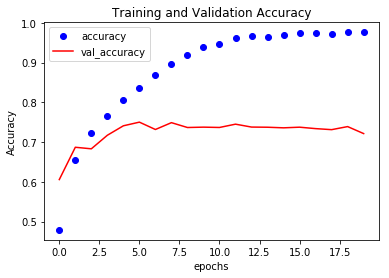

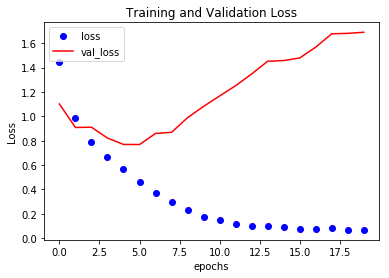

<Figure size 432x288 with 0 Axes>

In [29]:
accuracy  = cifar_train.history['acc']
val_accuracy = cifar_train.history['val_acc']
loss = cifar_train.history['loss']
val_loss = cifar_train.history['val_loss']
epochs = np.arange(len(accuracy))
plt.plot(epochs,accuracy,'bo',color='blue',label='accuracy')
plt.plot(epochs,val_accuracy,'b',color='red',label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.figure()
plt.plot(epochs,loss,'bo',color='blue',label='loss')
plt.plot(epochs,val_loss,'b',color='red',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

In [165]:
batch_size=64
epochs=25
num_classes=10

In [166]:
cifar_model_do=Sequential()
cifar_model_do.add(Conv2D(32,kernel_size=(3,3),activation='linear',padding='same',input_shape=(32,32,3)))
cifar_model_do.add(LeakyReLU(alpha=0.1))
cifar_model_do.add(MaxPooling2D((2,2),padding='same'))
cifar_model_do.add(Dropout(0.25))
cifar_model_do.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
cifar_model_do.add(LeakyReLU(alpha=0.1))
cifar_model_do.add(MaxPooling2D((2,2),padding='same'))
cifar_model_do.add(Dropout(0.25))
cifar_model_do.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
cifar_model_do.add(LeakyReLU(alpha=0.1))
cifar_model_do.add(MaxPooling2D((2,2),padding='same'))
cifar_model_do.add(Dropout(0.25))
cifar_model_do.add(Flatten())
cifar_model_do.add(Dense(128, activation='linear'))
cifar_model_do.add(LeakyReLU(alpha=0.1))           
cifar_model_do.add(Dropout(0.25))
cifar_model_do.add(Dense(num_classes,activation='softmax'))

In [167]:
cifar_model_do.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 64)          0         
__________

In [168]:
cifar_model_do.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [169]:
cifar_train_dropout = cifar_model_do.fit(train_X,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 95s 2ms/step - loss: 1.6126 - acc: 0.4139 - val_loss: 1.2341 - val_acc: 0.5654
Epoch 2/25
40000/40000 [==============================] - 94s 2ms/step - loss: 1.2092 - acc: 0.5681 - val_loss: 1.0107 - val_acc: 0.6451
Epoch 3/25
40000/40000 [==============================] - 94s 2ms/step - loss: 1.0449 - acc: 0.6299 - val_loss: 0.9053 - val_acc: 0.6794
Epoch 4/25
40000/40000 [==============================] - 95s 2ms/step - loss: 0.9456 - acc: 0.6661 - val_loss: 0.8484 - val_acc: 0.7008
Epoch 5/25
40000/40000 [==============================] - 95s 2ms/step - loss: 0.8794 - acc: 0.6896 - val_loss: 0.7901 - val_acc: 0.7256
Epoch 6/25
40000/40000 [==============================] - 95s 2ms/step - loss: 0.8223 - acc: 0.7107 - val_loss: 0.7608 - val_acc: 0.7360
Epoch 7/25
40000/40000 [==============================] - 95s 2ms/step - loss: 0.7782 - acc: 0.7237 - val_loss: 0.7454 - val_acc

In [122]:
#cifar_model_do.save("cifar_model_dropout.h5py")

In [314]:
test_eval_dropout = cifar_model_do.evaluate(x_test[0:10000,:,:,:],test_Y_one_hot[0:10000],verbose=1)

10000/10000 [==============================] - 5s 537us/step


In [315]:
print('test_loss',test_eval_dropout[0])
print('test_accuracy',test_eval_dropout[1])

test_loss 0.6565024703502655
test_accuracy 0.7869


<Figure size 432x288 with 0 Axes>

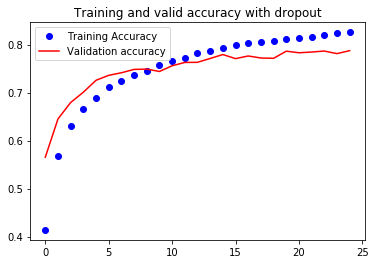

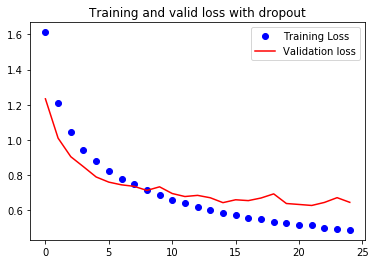

<Figure size 432x288 with 0 Axes>

In [295]:
accuracy = cifar_train_dropout.history['acc']
val_acc = cifar_train_dropout.history['val_acc']
loss = cifar_train_dropout.history['loss']
val_loss = cifar_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'o',label='Training Accuracy',color='blue')
plt.plot(epochs,val_acc,label='Validation accuracy',color='red')
plt.title('Training and valid accuracy with dropout')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'o',label='Training Loss',color='blue')
plt.plot(epochs,val_loss,label='Validation loss',color='red')
plt.title('Training and valid loss with dropout')
plt.legend()
plt.figure()

In [316]:
predicted_classes = cifar_model_do.predict(x_test)
predicted_classes = np.argmax(predicted_classes,axis=1)
print(predicted_classes)
predicted_classes = predicted_classes.reshape(10000,1)
print(predicted_classes.shape,y_test.shape)
#print(x_test[0,:,:,:])
#len(predicted_classes)

[3 8 8 ... 5 1 7]
(10000, 1) (10000, 1)
[[6]]


Found correct labels 7869
[0 1 2 3 4 5 6 7]
[8]


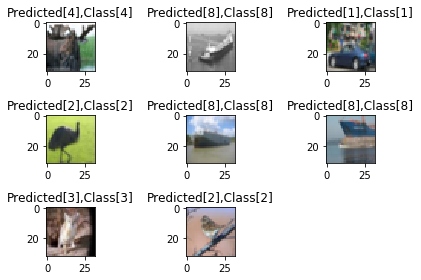

In [317]:
correct = np.where(predicted_classes==y_test)[0]
print('Found correct labels',len(correct))
print(correct[0:8])
print(y_test[2])
for i,correct in enumerate(correct[100:108]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(32,32,3),cmap='gray',interpolation='None')
    plt.title("Predicted{},Class{}".format(predicted_classes[correct],y_test[correct]))
    plt.tight_layout()

Found Incorrect Labels 2131


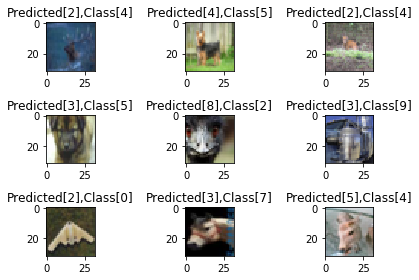

In [298]:
incorrect = np.where(predicted_classes!=y_test)[0]
print('Found Incorrect Labels',len(incorrect))
for i,incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(32,32,3),cmap='gray',interpolation='None')
    plt.title('Predicted{},Class{}'.format(predicted_classes[incorrect],y_test[incorrect]))
    plt.tight_layout()

In [299]:
from sklearn.metrics import classification_report
target_names = ['Class{}'.format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

      Class0       0.81      0.81      0.81      1000
      Class1       0.92      0.86      0.89      1000
      Class2       0.67      0.72      0.69      1000
      Class3       0.68      0.56      0.61      1000
      Class4       0.74      0.80      0.76      1000
      Class5       0.68      0.70      0.69      1000
      Class6       0.83      0.86      0.85      1000
      Class7       0.84      0.81      0.82      1000
      Class8       0.83      0.91      0.87      1000
      Class9       0.88      0.84      0.86      1000

   micro avg       0.79      0.79      0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [222]:
batch_size=32
epochs=25
num_classes=10

In [219]:
cifar_model_do_sig=Sequential()
cifar_model_do_sig.add(Conv2D(32,kernel_size=(3,3),activation='linear',padding='same',input_shape=(32,32,3)))
cifar_model_do_sig.add(LeakyReLU(alpha=0.1))
cifar_model_do_sig.add(MaxPooling2D((2,2),padding='same'))
cifar_model_do_sig.add(Dropout(0.25))
cifar_model_do_sig.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
cifar_model_do_sig.add(LeakyReLU(alpha=0.1))
cifar_model_do_sig.add(MaxPooling2D((2,2),padding='same'))
cifar_model_do_sig.add(Dropout(0.25))
cifar_model_do_sig.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
cifar_model_do_sig.add(LeakyReLU(alpha=0.1))
cifar_model_do_sig.add(MaxPooling2D((2,2),padding='same'))
cifar_model_do_sig.add(Dropout(0.25))
cifar_model_do_sig.add(Flatten())
cifar_model_do_sig.add(Dense(128, activation='linear'))
cifar_model_do_sig.add(LeakyReLU(alpha=0.1))           
cifar_model_do_sig.add(Dropout(0.25))
cifar_model_do_sig.add(Dense(num_classes,activation='sigmoid'))

In [220]:
cifar_model_do_sig.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 8, 8, 64)          0         
__________

In [221]:
cifar_model_do_sig.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [223]:
cifar_train_dropout_sig = cifar_model_do_sig.fit(train_X,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 274s 7ms/step - loss: 0.2520 - acc: 0.9068 - val_loss: 0.2032 - val_acc: 0.9203
Epoch 2/25
40000/40000 [==============================] - 95s 2ms/step - loss: 0.1952 - acc: 0.9240 - val_loss: 0.1682 - val_acc: 0.9350
Epoch 3/25
40000/40000 [==============================] - 98s 2ms/step - loss: 0.1704 - acc: 0.9338 - val_loss: 0.1460 - val_acc: 0.9423
Epoch 4/25
40000/40000 [==============================] - 101s 3ms/step - loss: 0.1561 - acc: 0.9388 - val_loss: 0.1350 - val_acc: 0.9466
Epoch 5/25
40000/40000 [==============================] - 100s 2ms/step - loss: 0.1461 - acc: 0.9432 - val_loss: 0.1317 - val_acc: 0.9486
Epoch 6/25
40000/40000 [==============================] - 99s 2ms/step - loss: 0.1393 - acc: 0.9455 - val_loss: 0.1339 - val_acc: 0.9477
Epoch 7/25
40000/40000 [==============================] - 91s 2ms/step - loss: 0.1314 - acc: 0.9484 - val_loss: 0.1209 - val_

In [343]:
test_eval_dropout_sigmoid = cifar_model_do_sig.evaluate(x_test[0:10000,:,:,:],test_Y_one_hot[0:10000],verbose=1)
print('test_loss',test_eval_dropout_sigmoid[0])
print('test_accuracy',test_eval_dropout_sigmoid[1])

10000/10000 [==============================] - 5s 548us/step
test_loss 0.10451776703596115
test_accuracy 0.9610000198364258


<Figure size 432x288 with 0 Axes>

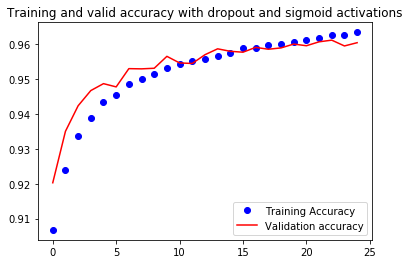

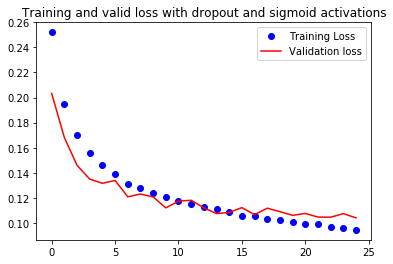

<Figure size 432x288 with 0 Axes>

In [361]:
accuracy = cifar_train_dropout_sig.history['acc']
val_acc = cifar_train_dropout_sig.history['val_acc']
loss = cifar_train_dropout_sig.history['loss']
val_loss = cifar_train_dropout_sig.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'o',label='Training Accuracy',color='blue')
plt.plot(epochs,val_acc,label='Validation accuracy',color='red')
plt.title('Training and valid accuracy with dropout and sigmoid activations')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'o',label='Training Loss',color='blue')
plt.plot(epochs,val_loss,label='Validation loss',color='red')
plt.title('Training and valid loss with dropout and sigmoid activations')
plt.legend()
plt.figure()

In [353]:
predicted_classes_sig = cifar_model_do_sig.predict_proba(x_test)
#print(predicted_classes_sig)
predicted_classes_sig = np.argmax((predicted_classes_sig),axis=1)
#print(predicted_classes_sig)
#print(y_train[0:9990])
predicted_classes_sig = predicted_classes_sig.reshape(10000,1)
#print(predicted_classes_sig.shape,y_test.shape)

Found correct labels 7961
[0 1 2 3 4 5 6 7]
[8]


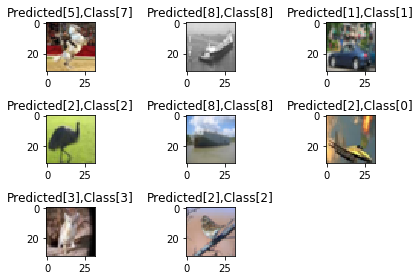

In [354]:
correct = np.where(predicted_classes_sig==y_test)[0]
print('Found correct labels',len(correct))
print(correct[0:8])
print(y_test[2])
for i,correct in enumerate(correct_sig[100:108]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(32,32,3),cmap='gray',interpolation='None')
    plt.title("Predicted{},Class{}".format(predicted_classes[correct],y_test[correct]))
    plt.tight_layout()

[  24   32   35 ... 9989 9995 9996]
Found Incorrect Labels 2039


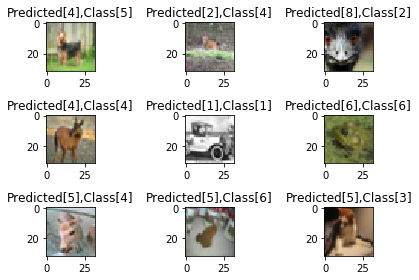

In [355]:
incorrect = np.where(predicted_classes_sig!=y_test)[0]
print(incorrect)
print('Found Incorrect Labels',len(incorrect))
for i,incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(32,32,3),cmap='gray',interpolation='None')
    plt.title('Predicted{},Class{}'.format(predicted_classes[incorrect],y_test[incorrect]))
    plt.tight_layout()

In [356]:
from sklearn.metrics import classification_report
target_names = ['Class{}'.format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes_sig, target_names=target_names))

              precision    recall  f1-score   support

      Class0       0.79      0.85      0.82      1000
      Class1       0.91      0.89      0.90      1000
      Class2       0.64      0.76      0.69      1000
      Class3       0.75      0.51      0.61      1000
      Class4       0.77      0.73      0.75      1000
      Class5       0.76      0.69      0.73      1000
      Class6       0.79      0.90      0.84      1000
      Class7       0.81      0.86      0.83      1000
      Class8       0.91      0.88      0.89      1000
      Class9       0.84      0.89      0.86      1000

   micro avg       0.80      0.80      0.80     10000
   macro avg       0.80      0.80      0.79     10000
weighted avg       0.80      0.80      0.79     10000

